## Executive Summary    
- Regression Analysis refers to a set of mathematical processes for estimating the variables    
- Regression analysis fits a model to observed data for analysis 
- However, deviations of the data from the observed data makes it impossible to find solutions to a given problem resulting to errors   
- Removal of these errors can be done mathematically, the cost of computations are costly and complex      
- Ordinary Least Square is a measure of finding and minimizing the errors   
- OLS makes it easy to find the vectors or hat matrix which reduces errors when fitting model to data   
- The beta vector is then used with test data to make new predictions  

##### Goal   
To understand the role of OLS in minimizing errors, how you can perform a regression experiment, using mathematical manipulations - similar to the one you performed using statsmodels   
a. Understand regression with matrix algebra    
b. and Mastery in NumPy scientific computation    

In [2]:
#import necessary libraries
# Linear algebra and calculus are important for ML, AL, and deep analytics
# OLS uses concepts of linear algebra, vectors,and matrices. As such numpy library is key


import numpy as np
import csv

In [4]:
#import data 
#inializing an empty list data to load data
data = []

#opening file using csv standard python
with open("windsor_housing.csv","r") as f:
    file = csv.reader(f)

    #drop names of columns row, only numeric values needed in this case
    next(file)
    
    #Append a column of all 1s to the data (bias) as the first column
    for rows in file:
        ones = [1.0]
        for row in rows:
            ones.append(float(row)) 

        #append rows to data list file
        data.append(ones)

#change to ndarrays for algebraic and linear operations
data = np.array(data)
data[:4,:]

array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        4.20e+04],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.85e+04],
       [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        4.95e+04],
       [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.05e+04]])

In [7]:
#Split data for training and testing the model built
# seed setting
np.random.seed(50)
# Split data into  70% train and 30% test split
# Make array of indices
all_idx = np.arange(data.shape[0])
# Randomly choose 70% subset of indices without replacement for training
training_idx = np.random.choice(all_idx, size=round(546 * 0.7), replace=False)
# Choose remaining 30% of indices for testing
test_idx = all_idx[~np.isin(all_idx, training_idx)]
# Subset data
training, test = data[training_idx, :], data[test_idx, :]

# Check the shape of datasets
print("Raw data Shape: ", data.shape)
print("Train/Test Split:", training.shape, test.shape)

# Create x and y for test and training sets
x_train = training[:, :-1]
y_train = training[:, -1]

x_test = test[:, :-1]
y_test = test[:, -1]

# Check the shape of datasets
print(
    "x_train, y_train, x_test, y_test:",
    x_train.shape,
    y_train.shape,
    x_test.shape,
    y_test.shape,
)

Raw data Shape:  (546, 13)
Train/Test Split: (382, 13) (164, 13)
x_train, y_train, x_test, y_test: (382, 12) (382,) (164, 12) (164,)


## Finding Beta, finding and minimizing errors
To compute the coefficients vector b in linear regression, we use the formula:

b = (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y

where:
- X is the design matrix, including the bias term as the first column,
- X<sup>T</sup> is the transpose of X,
- y is the target vector.

In this formula:
- (X<sup>T</sup> X)<sup>-1</sup> denotes the inverse of the matrix X<sup>T</sup> X,
- X<sup>T</sup> y denotes the matrix-vector product of X<sup>T</sup> and y.

This formula is used to find the coefficients b that minimize the sum of squared residuals


In [8]:
# Calculate Xt.X and Xt.y for beta = (XT . X)-1 . XT . y - as seen in previous lessons
Xt = np.transpose(x_train)
XtX = np.dot(Xt, x_train)
Xty = np.dot(Xt, y_train)

# Calculate inverse of Xt.X
XtX_inv = np.linalg.inv(XtX)

# Take the dot product of XtX_inv with Xty to compute beta
beta = XtX_inv.dot(Xty)

# Print the values of computed beta
print(beta)

[-6.27168116e+03  3.52716455e+00  1.96945669e+03  1.60218717e+04
  6.45660479e+03  7.01494385e+03  3.28626014e+03  5.69719517e+03
  1.50843753e+04  1.14783083e+04  4.94237850e+03  8.79804040e+03]


These are the raw score regression weights for the independent variables. They can be used alongside their independent variables to make predictions for the dependent variable. The raw score regression weights are significant for linear mapping between predictor and the target variable 

In [12]:
#new list for predicitons, y_predict
#multiply the raw score regression weight, beta,with its respective independent variable
#append results to list
#display results 
# Calculate and print predictions for each row of X_test
y_predict = []
for row in x_test:
    prediction = row.dot(beta)
    y_predict.append(prediction)

## Model Evaluation

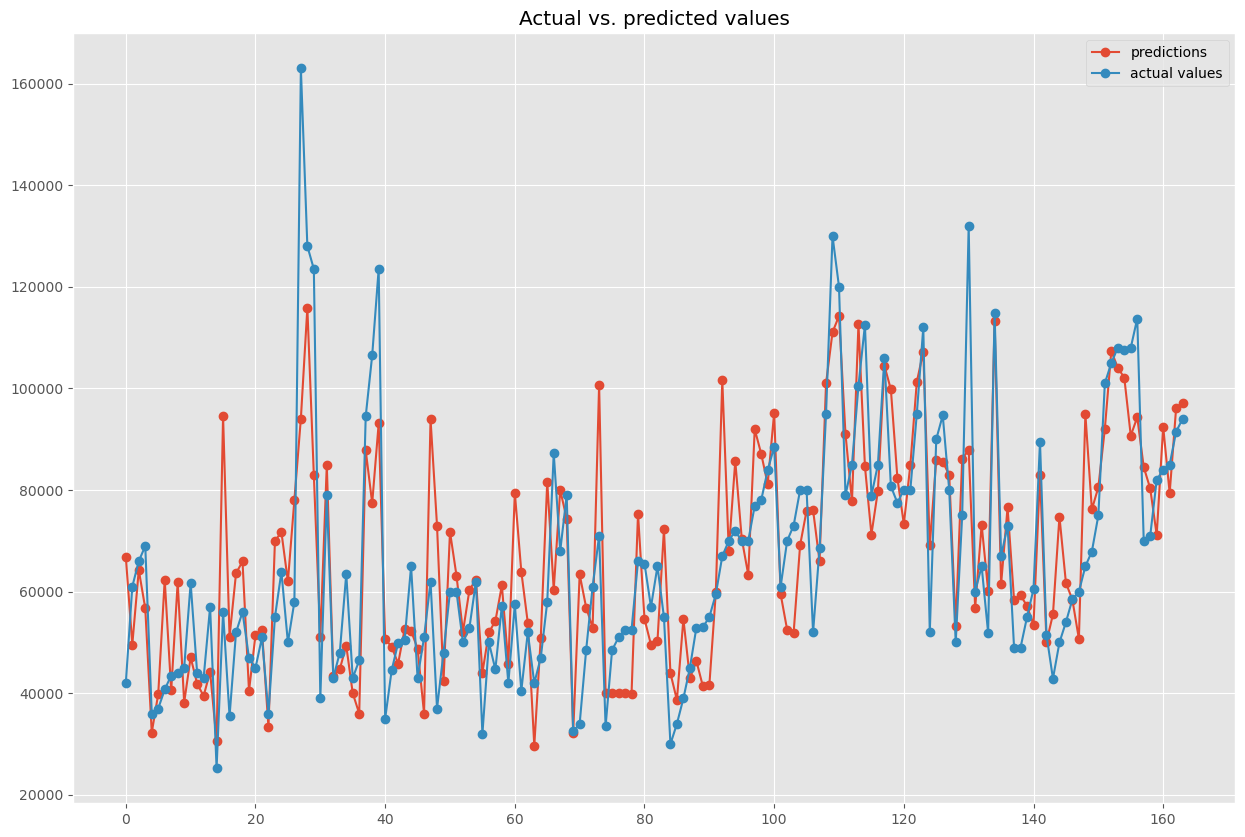

In [14]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt

%matplotlib inline
from pylab import rcParams

rcParams["figure.figsize"] = 15, 10
plt.style.use("ggplot")

plt.plot(y_predict, linestyle="-", marker="o", label="predictions")
plt.plot(y_test, linestyle="-", marker="o", label="actual values")
plt.title("Actual vs. predicted values")
plt.legend()
plt.show()

The graphs shows the norm between the predictions and actual values in the model. Accuracy is determine by the distance between predicted values and actual values. The lesser the distance the more accurate the model is for use. This can be done through optimizing the fit model in OLS. However, that is note the goal here. The goal was to understand regression with matrix algebra and Master in NumPy scientific computation 